In [1]:
!pip install rasterio

In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Variables

### Cohesion:

(151, 204)

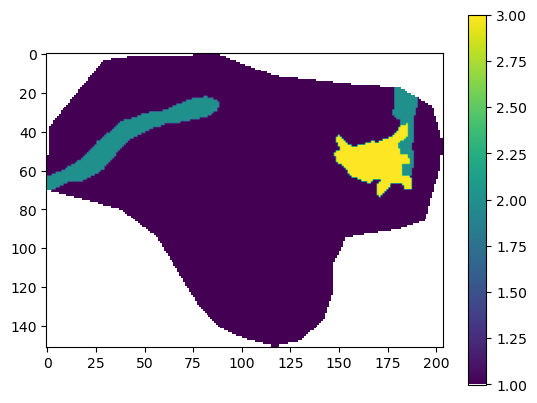

In [26]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/Base%20fisica/Cohesion1.tif?raw=true') # (kN/m2)
cohesion=raster.read(1)
cohesion=np.where(cohesion==cohesion[0,0],np.nan,cohesion)
plt.imshow(cohesion)
plt.colorbar();
np.shape(cohesion)

### Friccion:

(151, 204)

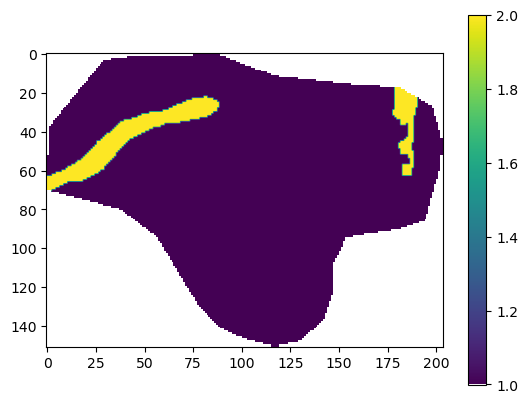

In [25]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/Base%20fisica/friccion1.tif?raw=true') #(radianes)
friccion=raster.read(1)
friccion=np.where(friccion==friccion[0,0],np.nan,friccion) #ya py lee los nans
plt.imshow(friccion)
plt.colorbar();
np.shape(friccion)

### Peso especifico:

(151, 204)

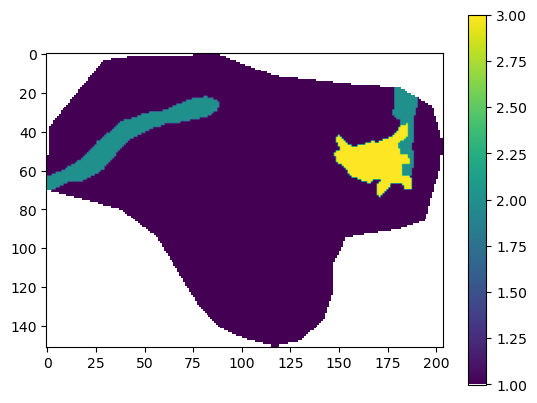

In [22]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/Base%20fisica/peso_especif1.tif?raw=true') #(kN/m3)
peso=raster.read(1)
peso=np.where(peso==peso[0,0],np.nan,peso)
plt.imshow(peso)
plt.colorbar();
np.shape(peso)

### Permeabilidad:

(151, 204)

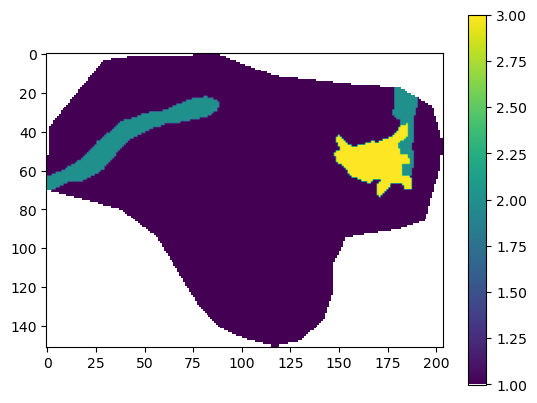

In [23]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/Base%20fisica/Permeabilidad1.tif?raw=true') #(cm/hora)
ks=raster.read(1)
ks[0,0]
ks=np.where(ks==ks[0,0],np.nan,ks)
plt.imshow(ks)
plt.colorbar();
np.shape(ks)

### Espesor: 

(151, 204)

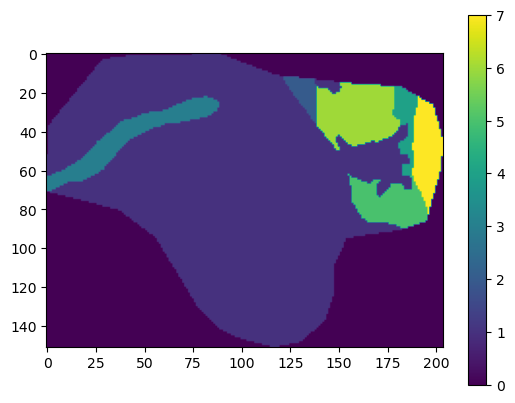

In [21]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/Base%20fisica/espesor1.tif?raw=true') #(m)
espesor=raster.read(1)
espesor[0,0]
espesor=np.where(espesor==ks[0,0],np.nan,espesor)
plt.imshow(espesor)
plt.colorbar();
np.shape(espesor)

### Pendiente:

(151, 204)

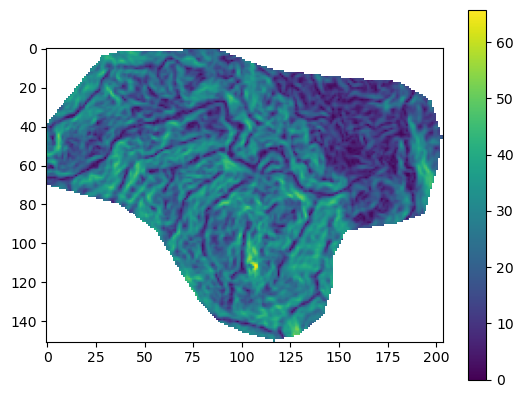

In [20]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/PEND1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente);
plt.colorbar();
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
np.shape(pendiente)

### Acumulacion de flujo:

(151, 204)

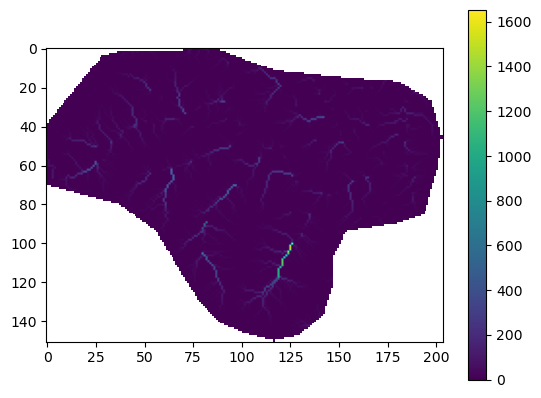

In [27]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/Base%20fisica/FlowAcc_final1.tif?raw=true') #(m2)
flujo=raster.read(1)
flujo=np.where(flujo==flujo[0,0],np.nan,flujo)
plt.imshow(flujo)
plt.colorbar();
np.shape(flujo)

In [28]:
GammaW   = 9.81 #peso unitario del agua [kN/m3]
dx = 12.5 # resolucion espacial del raster [m]
q = 100 #intensidad de la precipitacion [mm/h]

In [29]:
"STABILITY ANALYSIS"

MatEst = np.zeros(raster.shape)
Matq   = np.zeros(raster.shape)

M4=flujo/dx
M5=((0.01 * ks * (espesor * np.cos(pendiente)) * np.sin(pendiente)) / (0.001*q)) * ((peso / GammaW) * (1 - np.tan(pendiente) / np.tan(friccion)) + (cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))) 
MatEst1=np.where(M4>M5,3,MatEst) #  unstable

MatEst2=np.where(M4<=M5,4,MatEst1) # Stable

M1=np.tan(pendiente)
M2=(1 - (GammaW/peso)) * np.tan(friccion) + (cohesion / (peso * espesor * np.cos(pendiente)**2))
MatEst3  =np.where(M1<M2,1,MatEst2) # Unconditionally stable
	
M3=np.tan(friccion) + (cohesion / (peso * espesor * np.cos(pendiente)**2))
MatEst4  =  np.where(M1>=M3,2,MatEst3) # Unconditionally Unstable

Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo) * ((peso / GammaW) * (1 - (np.tan(pendiente) / np.tan(friccion))) + cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))
np.nanmin(Matq)

MatEst=np.where(MatEst4 == 0, np.nan,MatEst4)
Matq=np.where(Matq==np.inf,np.nanmax(Matq[Matq!=np.inf]),Matq)

Matq = np.where(M1<M2,-1,np.where(M1>=M3,-2,Matq))

C:\Users\Juan Esteban\AppData\Local\Temp\ipykernel_13628\3061725108.py:19: RuntimeWarning: divide by zero encountered in true_divide
  Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo) * ((peso / GammaW) * (1 - (np.tan(pendiente) / np.tan(friccion))) + cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))
C:\Users\Juan Esteban\AppData\Local\Temp\ipykernel_13628\3061725108.py:19: RuntimeWarning: invalid value encountered in multiply
  Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo) * ((peso / GammaW) * (1 - (np.tan(pendiente) / np.tan(friccion))) + cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))


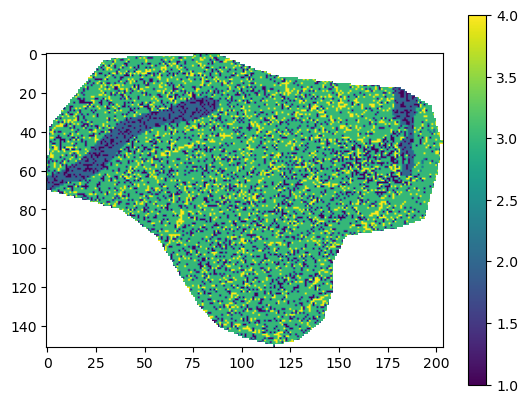

In [30]:
plt.imshow(MatEst)
plt.colorbar()

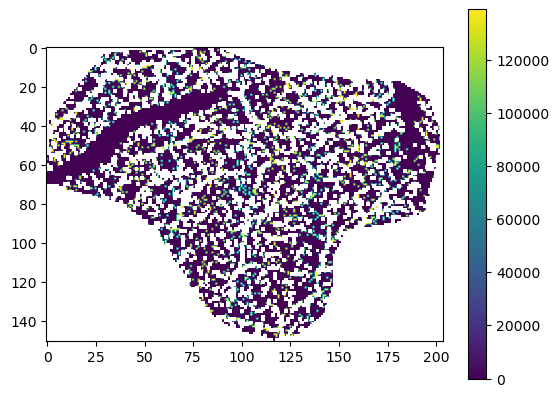

In [31]:
plt.imshow(Matq)
plt.colorbar()

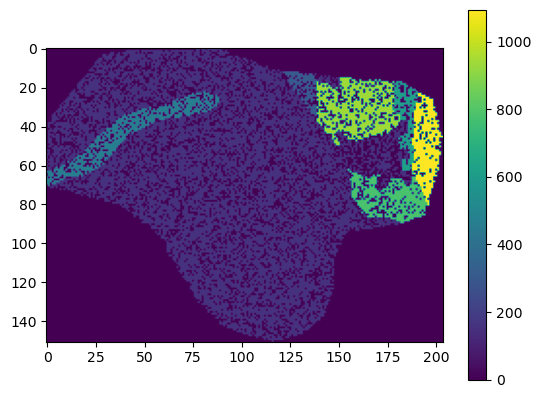

In [32]:
Vol = np.where(np.logical_or(MatEst==2, MatEst==3), espesor*12.5*12.5, 0)

with rio.open('Vol.tif', 'w', 
              driver='Gtiff',height=raster.shape[0],width=raster.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster.crs,transform=raster.transform) as dst:
    dst.write(Vol,1) 

plt.imshow(Vol)
plt.colorbar()